In [91]:
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

np.set_printoptions(suppress=True)

%matplotlib inline

In [92]:
files = glob.glob('./dat_challenger_only/*match*')

print(len(files))

7540


In [40]:
'timeline_%d.json' % (match['gameId'])

'timeline_2860878947.json'

In [94]:
duration = []
surrender = []
for i, match_file in enumerate(files):
    if i % 100 == 0: print(i)
    try:
        with open(match_file, 'r') as fm:
            match = json.load(fm)
        timeline_file = './dat_challenger_only/timeline_%d.json' % (match['gameId'])
        with open(timeline_file, 'r') as ft:
            timeline = json.load(ft)
            
        duration.append(int(match['gameDuration']))
        game_ended_by_surrender = 1

        for event in timeline['frames'][-1]['events']:
            if event['type'] == 'BUILDING_KILL':
                if event['towerType'] == 'NEXUS_TURRET':
                    game_ended_by_surrender = 0
        
        surrender.append(game_ended_by_surrender)

    except:
        print('%s has no timeline file' % (match_file))
        continue

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
./dat_challenger_only/match_2772380991.json has no timeline file
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500


In [95]:
ind = np.argsort(np.array(duration)/60)
duration = (np.array(duration)/60)[ind]
surrender = np.array(surrender)[ind]

In [96]:
sum(surrender)
# defining surrender as not having nexus kill in last minute

3029

In [ ]:
# see how duration differs if surrender vs not

/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


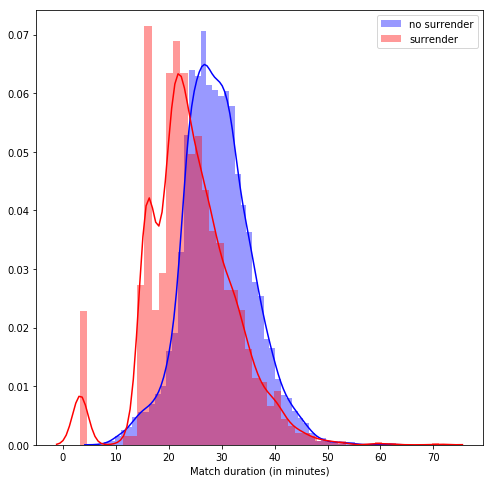

In [98]:
cutoff = 0
plt.figure(figsize=(8, 8))  # in inches

sb.distplot(duration[np.where((surrender == 0) & (duration > cutoff))],bins=50,color='blue',label='no surrender');
sb.distplot(duration[np.where((surrender == 1) & (duration > cutoff))],bins=50,color='red',label='surrender');
plt.legend()
plt.xlabel('Match duration (in minutes)');

In [99]:
match

{'gameId': 2861003901,
 'platformId': 'NA1',
 'gameCreation': 1536323993425,
 'gameDuration': 1510,
 'queueId': 420,
 'mapId': 11,
 'seasonId': 11,
 'gameVersion': '8.17.243.3340',
 'gameMode': 'CLASSIC',
 'gameType': 'MATCHED_GAME',
 'teams': [{'teamId': 100,
   'win': 'Fail',
   'firstBlood': True,
   'firstTower': False,
   'firstInhibitor': False,
   'firstBaron': False,
   'firstDragon': True,
   'firstRiftHerald': False,
   'towerKills': 3,
   'inhibitorKills': 0,
   'baronKills': 0,
   'dragonKills': 1,
   'vilemawKills': 0,
   'riftHeraldKills': 0,
   'dominionVictoryScore': 0,
   'bans': [{'championId': 28, 'pickTurn': 1},
    {'championId': 12, 'pickTurn': 2},
    {'championId': 121, 'pickTurn': 3},
    {'championId': 39, 'pickTurn': 4},
    {'championId': 84, 'pickTurn': 5}]},
  {'teamId': 200,
   'win': 'Win',
   'firstBlood': False,
   'firstTower': True,
   'firstInhibitor': True,
   'firstBaron': True,
   'firstDragon': False,
   'firstRiftHerald': True,
   'towerKills':